## Analisis Data Transjakarta
## Latar Belakang

TransJakarta adalah layanan bus rapid transit (BRT) yang beroperasi di Jakarta, Indonesia, yang bertujuan untuk menyediakan transportasi publik yang efisien dan nyaman bagi penduduk Jakarta. Dengan adanya sistem pembayaran elektronik menggunakan berbagai jenis kartu, seperti e-money, Flazz, dan kartu DKI, TransJakarta dapat mencatat dan mengelola data perjalanan penumpang secara rinci. Dataset ini mencakup berbagai informasi penting, seperti identitas kartu, bank penerbit, nama dan jenis kelamin pengguna kartu, tanggal lahir, koridor dan arah perjalanan, serta titik masuk dan keluar penumpang, termasuk waktu dan lokasi tap in dan tap out. Data ini juga mencatat jumlah pembayaran yang dilakukan oleh penumpang untuk setiap perjalanan.

## Pernyataan Masalah
Penggunaan Layanan:

Seberapa efektif dan efisien penggunaan layanan TransJakarta oleh berbagai kelompok demografis?
Bagaimana distribusi penggunaan layanan berdasarkan koridor dan waktu tertentu?

Analisis Perjalanan:

Apa pola perjalanan penumpang, termasuk rute yang paling sering digunakan dan waktu perjalanan yang paling sibuk?
Bagaimana pola tap in dan tap out di berbagai titik pemberhentian?

Keamanan dan Kepuasan Pengguna:

Apakah ada tren dalam data yang menunjukkan masalah keamanan atau ketidaknyamanan bagi pengguna tertentu?
Bagaimana variasi pembayaran mempengaruhi kepuasan pengguna?

Optimasi Layanan:

Bagaimana TransJakarta dapat mengoptimalkan rute dan jadwal berdasarkan data perjalanan yang ada?
Apakah ada koridor atau titik pemberhentian yang memerlukan penyesuaian untuk meningkatkan efisiensi layanan?

Analisis Demografis:

Bagaimana karakteristik demografis pengguna (seperti usia dan jenis kelamin) mempengaruhi pola penggunaan TransJakarta?
Apakah ada perbedaan signifikan dalam penggunaan layanan berdasarkan bank penerbit kartu?

**Exploratory Data Analysis Public Transportation Transaction Transjakarta**

1. Context
    Dataset ini berisi informasi mengenai transaksi kartu pembayaran untuk layanan bus Transjakarta di Jakarta. Data ini mencakup detail seperti ID transaksi, kartu pembayaran, bank penerbit kartu, nama pemilik kartu, jenis kelamin, tanggal lahir, koridor, dan detail perjalanan seperti waktu tap in/out dan jumlah pembayaran.

2. Audience
    Audiens utama untuk analisis ini mencakup:

    - Manajemen Transjakarta: Untuk memahami pola penggunaan layanan dan meningkatkan layanan transportasi.

3. Business Problem
    - Penggunaan Layanan:

    Seberapa efektif dan efisien penggunaan layanan TransJakarta oleh berbagai kelompok demografis?
    Bagaimana distribusi penggunaan layanan berdasarkan koridor dan waktu tertentu?

    - Analisis Perjalanan:

    Apa pola perjalanan penumpang, termasuk rute yang paling sering digunakan dan waktu perjalanan yang paling sibuk?
    Bagaimana pola tap in dan tap out di berbagai titik pemberhentian?

    - Kepuasan Pengguna:

    Bagaimana variasi pembayaran mempengaruhi kepuasan pengguna?

    - Optimasi Layanan:

    Bagaimana TransJakarta dapat mengoptimalkan rute dan jadwal berdasarkan data perjalanan yang ada?
    Apakah ada koridor atau titik pemberhentian yang memerlukan penyesuaian untuk meningkatkan efisiensi layanan?

    - Analisis Demografis:

    Bagaimana karakteristik demografis pengguna (seperti usia dan jenis kelamin) mempengaruhi pola penggunaan TransJakarta?
    Apakah ada perbedaan signifikan dalam penggunaan layanan berdasarkan bank penerbit kartu?

4. Tujuan
    Tujuan dari EDA ini adalah:

    Mengidentifikasi pola penggunaan layanan Transjakarta.
    Memahami karakteristik demografi pengguna.
    Menentukan rute dan koridor yang paling sering digunakan.
    Mengidentifikasi waktu puncak penggunaan layanan.
    Memberikan rekomendasi untuk peningkatan layanan.

5. Business Question
    Beberapa pertanyaan bisnis yang relevan antara lain:

    Rute dan koridor mana yang paling sering digunakan oleh penumpang?
    Bagaimana pola perjalanan penumpang pada hari kerja vs akhir pekan?
    Apakah ada perbedaan penggunaan layanan berdasarkan demografi (jenis kelamin, usia)?
    Kapan waktu puncak penggunaan layanan Transjakarta?

6. Insight
    Dari EDA ini, beberapa insight yang bisa diharapkan antara lain:

    Rute atau koridor dengan volume penumpang tertinggi.
    Distribusi demografis penumpang yang menggunakan layanan.
    Waktu puncak penggunaan (misalnya jam berangkat kerja dan pulang kerja).
    Efisiensi waktu perjalanan di berbagai rute.
    Perbandingan jumlah penumpang berdasarkan jenis kelamin dan kelompok usia.

7. Aksi Rekomendasi
    Berdasarkan insight yang diperoleh, beberapa aksi yang bisa direkomendasikan antara lain:

    Menyesuaikan jadwal bus dan menambah armada pada rute yang memiliki volume penumpang tinggi.
    Mengimplementasikan solusi teknologi untuk menginformasikan penumpang tentang waktu kedatangan bus secara real-time.
    Mengoptimalkan rute berdasarkan analisis kemacetan dan waktu perjalanan.
    Melakukan kampanye atau program untuk menarik lebih banyak penumpang berdasarkan analisis demografi.
    Meningkatkan fasilitas di halte atau koridor yang sering digunakan untuk meningkatkan kenyamanan penumpang.

## Data
Untuk menjawab pertanyaan di atas, kita akan menganalisa data peserta yang sudah dikumpulkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind
import statsmodels.api as sm
from scipy.stats import pearsonr

import warnings
warnings.filterwarnings("ignore")

Dataset TransJakarta ini memiliki 22 kolom dengan informasi yang cukup rinci mengenai perjalanan penumpang. Berikut adalah penjelasan untuk setiap kolom:

1. transID: ID unik untuk setiap transaksi atau perjalanan yang tercatat.
2. payCardID: ID kartu pembayaran yang digunakan oleh penumpang.
3. payCardBank: Bank penerbit dari kartu pembayaran.
4. payCardName: Nama pemilik kartu pembayaran.
5. payCardSex: Jenis kelamin pemilik kartu pembayaran (M untuk laki-laki, F untuk perempuan).
6. payCardBirthDate: Tahun kelahiran pemilik kartu pembayaran.
7. corridorID: ID koridor atau rute TransJakarta yang digunakan.
8. corridorName: Nama koridor atau rute yang digunakan.
9. direction: Arah perjalanan pada koridor (0 atau 1, tergantung pada sistem pengkodean arah).
10. tapInStops: ID titik pemberhentian tempat penumpang melakukan tap in (masuk).
11. tapInStopsName: Nama titik pemberhentian tempat penumpang melakukan tap in.
12. tapInStopsLat: Koordinat lintang (latitude) titik pemberhentian tempat penumpang melakukan tap in.
13. tapInStopsLon: Koordinat bujur (longitude) titik pemberhentian tempat penumpang melakukan tap in.
14. stopStartSeq: Urutan pemberhentian awal dalam koridor perjalanan.
15. tapInTime: Waktu penumpang melakukan tap in (format tanggal dan waktu).
16. tapOutStops: ID titik pemberhentian tempat penumpang melakukan tap out (keluar).
17. tapOutStopsName: Nama titik pemberhentian tempat penumpang melakukan tap out.
18. tapOutStopsLat: Koordinat lintang (latitude) titik pemberhentian tempat penumpang melakukan tap out.
19. tapOutStopsLon: Koordinat bujur (longitude) titik pemberhentian tempat penumpang melakukan tap out.
20. stopEndSeq: Urutan pemberhentian akhir dalam koridor perjalanan.
21. tapOutTime: Waktu penumpang melakukan tap out (format tanggal dan waktu).
22. payAmount: Jumlah pembayaran yang dilakukan oleh penumpang untuk perjalanan tersebut.

Kolom-kolom ini memberikan gambaran yang komprehensif tentang perjalanan yang dilakukan oleh penumpang TransJakarta, dari titik awal hingga titik akhir perjalanan, termasuk detail pembayaran dan identitas pengguna.

Berikut 5 baris teratas dan terbawah dari dataset Transjakarta

In [2]:
df=pd.read_csv('Transjakarta.csv')
df_raw = df.copy()

display(df.head(),df.tail())

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0
37899,FMZZ963S4B68ZP,501862539795,flazz,drg. Leo Najmudin,F,1985,13,Ciledug - Tendean,0.0,P00001,...,106.74786,2,2023-04-12 21:08:12,P00106,Kebayoran Lama,-6.238340,106.77752,7.0,2023-04-12 21:34:53,3500.0


## Data Understanding and Cleaning
Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

In [3]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (37900, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-nul

In [4]:
display(df.describe(), df.describe(include='object'))

,payCardID,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,stopEndSeq,payAmount
count,3.790000e+04,37900.000000,37900.000000,37900.000000,37900.000000,37900.000000,36556.000000,36556.000000,36556.000000,36893.000000
mean,4.250060e+17,1990.089314,0.500633,-6.214838,106.841554,13.572480,-6.214651,106.841233,21.219909,2699.712683
std,1.321699e+18,13.051482,0.500006,0.057911,0.060369,12.237623,0.059022,0.060999,13.800689,4212.225592
min,6.040368e+10,1946.000000,0.000000,-6.394973,106.614730,0.000000,-6.394973,106.614730,1.000000,0.000000
25%,1.800442e+14,1982.000000,0.000000,-6.245863,106.803470,4.000000,-6.247225,106.801750,11.000000,0.000000
50%,3.507947e+15,1990.000000,1.000000,-6.214587,106.834830,10.000000,-6.214718,106.834580,18.000000,3500.000000
75%,4.699023e+15,2001.000000,1.000000,-6.175528,106.882270,19.000000,-6.174736,106.883030,29.000000,3500.000000
max,4.997694e+18,2012.000000,1.000000,-6.089429,107.023950,68.000000,-6.091746,107.023660,77.000000,20000.000000


,transID,payCardBank,payCardName,payCardSex,corridorID,corridorName,tapInStops,tapInStopsName,tapInTime,tapOutStops,tapOutStopsName,tapOutTime
count,37900,37900,37900,37900,36643,35970,36687,37900,37900,35611,36556,36556
unique,37900,6,1993,2,221,216,2570,2602,37079,2230,2248,35908
top,EIIW227B8L34VB,dki,Fathonah Saefullah,F,1T,Cibubur - Balai Kota,P00170,Penjaringan,2023-04-25 06:23:00,P00016,BKN,2023-04-10 19:10:15
freq,1,18743,80,20157,400,391,236,243,3,306,316,3


In [5]:
# Check unique values for every columns
pd.set_option('display.max_colwidth', 150)

list_item = []
for col in df.columns :
    list_item.append([col, df[col].nunique(), df[col].unique()])

df_unique = pd.DataFrame(columns=['columnName', 'numberOfUnique', 'uniqueSample'],
                    data=list_item)
df_unique

,columnName,numberOfUnique,uniqueSample
0,transID,37900,"[EIIW227B8L34VB, LGXO740D2N47GZ, DJWR385V2U57TO, JTUZ800U7C86EH, VMLO535V7F95NJ, DDES630K2F80KC, HEMW326B9N91TV, XTKE052E5E87LN, OIHS248V7S72EB, E..."
1,payCardID,2000,"[180062659848800, 4885331907664776, 4996225095064169, 639099174703, 570928206772, 2251412124634980, 213155822653833, 3587341902618993, 65100139886..."
2,payCardBank,6,"[emoney, dki, flazz, online, brizzi, bni]"
3,payCardName,1993,"[Bajragin Usada, Gandi Widodo, Emong Wastuti, Surya Wacana, Embuh Mardhiyah, Tirta Siregar, R. Devi Hariyah, S.T., Darmanto Rajasa, Cagak Maheswar..."
4,payCardSex,2,"[M, F]"
5,payCardBirthDate,67,"[2008, 1997, 1992, 1978, 1982, 1993, 1974, 1991, 2004, 1984, 1988, 2002, 1975, 2011, 2003, 1981, 2009, 1983, 1999, 2007, 1979, 1960, 1995, 2001, 1..."
6,corridorID,221,"[5, 6C, R1A, 11D, 12, 1T, JAK.18, nan, B14, 1Q, 5M, M7B, 9A, 4, JAK.46, S22, 13, 9E, M9, JAK.88, T11, JAK.16, 6V, 11Q, JAK.02, 11, 1C, 3B, M1, 7E,..."
7,corridorName,216,"[Matraman Baru - Ancol, Stasiun Tebet - Karet via Patra Kuningan, Pantai Maju - Kota, Pulo Gebang - Pulo Gadung 2 via PIK, Tanjung Priok - Pluit, ..."
8,direction,2,"[1.0, 0.0]"
9,tapInStops,2570,"[P00142, B01963P, B00499P, B05587P, P00239, B00127P, B00243P, B03416P, B00795P, B05781P, B05433P, P00254, P00281, P00159, B00608P, B05291P, P00096..."


## Data Cleaning 

In [6]:
# Missing values percentage for every columns
missing_values = (df.isna().sum() / df.shape[0] * 100).round(2)
missing_values

transID             0.00
payCardID           0.00
payCardBank         0.00
payCardName         0.00
payCardSex          0.00
payCardBirthDate    0.00
corridorID          3.32
corridorName        5.09
direction           0.00
tapInStops          3.20
tapInStopsName      0.00
tapInStopsLat       0.00
tapInStopsLon       0.00
stopStartSeq        0.00
tapInTime           0.00
tapOutStops         6.04
tapOutStopsName     3.55
tapOutStopsLat      3.55
tapOutStopsLon      3.55
stopEndSeq          3.55
tapOutTime          3.55
payAmount           2.66
dtype: float64

<Axes: >

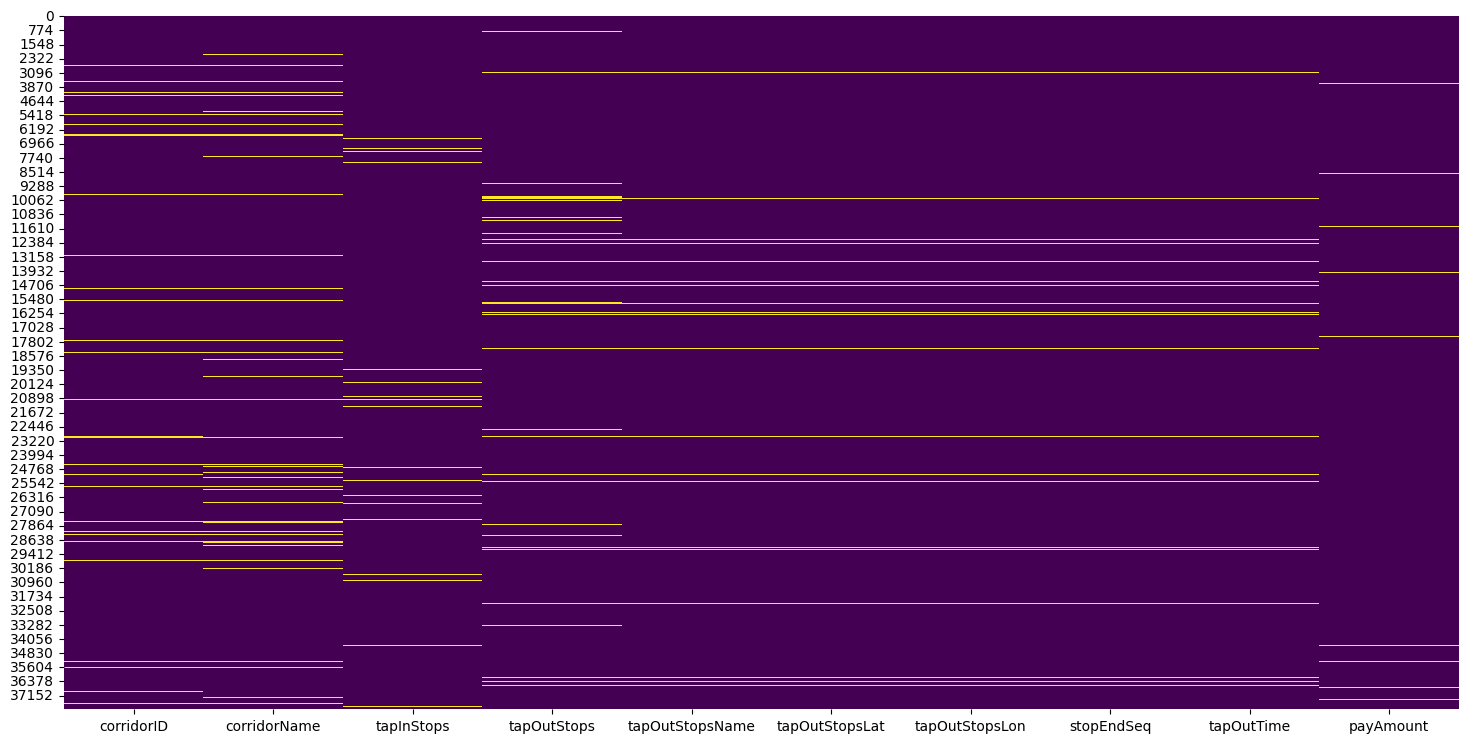

In [7]:
# Cek distribusi missing values 
col_missing = missing_values[missing_values > 0].index
df_missing = df[col_missing]

plt.figure(figsize=(18, 9))
sns.heatmap(df_missing.isna(), cbar=False, cmap='viridis')

Kolom dengan Nilai Hilang:

Beberapa kolom seperti corridorID, corridorName, tapOutStops, tapOutStopsName, tapOutStopsLat, tapOutStopsLon, stopEndSeq, tapOutTime, dan payAmount memiliki nilai yang hilang.

Distribusi Nilai Hilang:

Nilai yang hilang tidak tersebar secara merata di seluruh baris. Ada beberapa pola di mana baris tertentu memiliki lebih banyak nilai yang hilang dibandingkan dengan yang lain.
Kolom corridorName, tapOutStopsName, tapOutStopsLat, dan tapOutStopsLon tampaknya memiliki banyak nilai yang hilang di sejumlah besar baris, menunjukkan bahwa data ini mungkin tidak lengkap atau ada masalah dengan pengumpulan data untuk kolom-kolom tersebut.

Konsistensi Nilai Hilang:

Beberapa kolom memiliki nilai hilang yang konsisten di seluruh baris, misalnya, jika tapOutStopsLat hilang, maka tapOutStopsLon juga sering hilang. Hal ini bisa menunjukkan adanya hubungan atau ketergantungan antar kolom tersebut.

## CorridorID
tampilkan missing values pada kolom CorridorID

In [8]:
df.loc[df['corridorID'].isna() == True, ['corridorID', 'corridorName']]

,corridorID,corridorName
7,NaN,NaN
120,NaN,NaN
240,NaN,NaN
250,NaN,NaN
257,NaN,NaN
...,...,...
37689,NaN,NaN
37727,NaN,NaN
37770,NaN,NaN
37797,NaN,Rusun Marunda - Terminal Terpadu Pulo Gebang


tampilkan total baris corridorID yang kosong

In [9]:
Jumlah_missing_corridorID = df['corridorID'].isnull().sum()
print('Missing corridorID: ', Jumlah_missing_corridorID )

df_missing_corridorID = df[df['corridorID'].isnull() & df['corridorName'].notnull()][['corridorID', 'corridorName']]
print('Missing corridorID tapi memiliki corridorName: ', df_missing_corridorID.shape[0])
df_missing_corridorID.head()

Missing corridorID:  1257
Missing corridorID tapi memiliki corridorName:  132


,corridorID,corridorName
438,NaN,Rusun Waduk Pluit - Penjaringan
895,NaN,Tanah Abang - Kebayoran Lama
1410,NaN,Sunter Boulevard Barat - Penjaringan
1723,NaN,Pulo Gebang - Pulo Gadung 2 via PIK
2423,NaN,Kampung Melayu - Pulo Gebang via BKT


Pada data diatas, dapat kita lihat bahwa terdapat data corridorName meskipun data corridorID kosong (NaN).
Selanjutnya, membuat dataframe yang berisi pasangan antara corridorID dan corridorName

In [10]:
# Filter baris dimana 'corridorID' dan 'corridorName' tidak bernilai NaN
df_filtered = df[['corridorID', 'corridorName']].dropna()

# Hapus duplikat baris berdasarkan kolom 'corridorID' dan 'corridorName'
df_deduped = df_filtered.drop_duplicates(['corridorID', 'corridorName'])

# Urutkan kerangka data berdasarkan 'corridorID'
df_sorted = df_deduped.sort_values(by='corridorID')

# Reset index pada dataframe
df_corridor = df_sorted.reset_index(drop=True)
df_corridor


,corridorID,corridorName
0,1,Blok M - Kota
1,10,Tanjung Priok - PGC 2
2,10A,Rusun Marunda - Tanjung Priok
3,10B,Rusun Cipinang Besar Selatan - Penas Kalimalang
4,10D,Kampung Rambutan - Tanjung Priok
...,...,...
216,S21,Ciputat - CSW
217,S22,Ciputat - Kampung Rambutan
218,S31,Bintaro - Fatmawati
219,T11,Poris Plawad - Bundaran Senayan


Kemudian, cek corridorName yang memiliki 2 atau lebih corridorID

In [11]:
# Filter baris dimana 'corridorName' muncul lebih dari satu kali
duplicate_corridors = df_corridor[df_corridor.duplicated('corridorName', keep=False)]

# Print group duplikat
for corridor_name in duplicate_corridors['corridorName'].unique():
    cor_id = duplicate_corridors[duplicate_corridors['corridorName'] == corridor_name]
    print(cor_id)


    corridorID   corridorName
0            1  Blok M - Kota
198         M1  Blok M - Kota
    corridorID         corridorName
41           2  Pulo Gadung - Monas
204         M2  Pulo Gadung - Monas
    corridorID                         corridorName
49           3  Kalideres - Bundaran HI via Veteran
205         M3  Kalideres - Bundaran HI via Veteran
    corridorID           corridorName
62           5  Matraman Baru - Ancol
207         M5  Matraman Baru - Ancol
    corridorID          corridorName
98           9  Pinang Ranti - Pluit
212         M9  Pinang Ranti - Pluit


Ganti corridorID M1, M2, M3, M5, dan M9 dengan 1, 2, 3, 5, dan 9.

In [12]:
corridor_mapping = {
    'M1': '1',
    'M2': '2',
    'M3': '3',
    'M5': '5',
    'M9': '9'
}

df['corridorID'] = df['corridorID'].map(corridor_mapping).fillna(df['corridorID'])


Hapus corridorID M1, M2, M3, M5, dan M9 di df_corridorID, karena kita sudah memiliki 1, 2, 3, 5, dan 9.

In [13]:
df_corridor = df_corridor.query('corridorID not in ["M1", "M2", "M3", "M5", "M9"]')


Isi baris CorridorID yang kosong tetapi memiliki corridorName.

In [14]:
for index in range(len(df)):
    if type(df.loc[index,'corridorID']) != type(np.NAN):
        continue
    if type(df.loc[index,'corridorName']) == type(np.NAN):
        continue
    df.loc[index,'corridorID'] = df_corridor.loc[df_corridor['corridorName'] == df.loc[index, 'corridorName'], 'corridorID'].reset_index(drop=True)[0]


In [15]:
print('corridorID sebelum: ', df_raw['corridorID'].isna().sum())
print('corridorID sesudah cleaning: ', df['corridorID'].isna().sum())

df_missing_corridorID = df.loc[(df['corridorID'].isna() == True) & (df['corridorName'].isna() == False), ['corridorID', 'corridorName']]
print('Missing corridorID tapi memiliki corridorName: ',df_missing_corridorID['corridorName'].count())

corridorID sebelum:  1257
corridorID sesudah cleaning:  1125
Missing corridorID tapi memiliki corridorName:  0


## corridorName
Tampilkan total baris corridorName yang kosong 

In [16]:
print('Missing corridorName: ', df['corridorName'].isna().sum())

df_missing_corridorName = df.loc[(df['corridorName'].isna() == True) & (df['corridorID'].isna() == False), ['corridorName', 'corridorID']]
print('Missing corridorName tapi memiliki corridorID: ', df_missing_corridorName['corridorID'].count())
df_missing_corridorName.head()

Missing corridorName:  1930
Missing corridorName tapi memiliki corridorID:  805


,corridorName,corridorID
38,NaN,5M
39,NaN,2
60,NaN,T21
61,NaN,12A
73,NaN,3


Isi baris corridorName yang kosong tetapi memiliki corridorID.

In [17]:
for index in range(len(df)):
    if type(df.loc[index, 'corridorName']) != type(np.NAN):
        continue
    if type(df.loc[index, 'corridorID']) == type(np.NAN):
        continue
    df.loc[index, 'corridorName'] = df_corridor.loc[df_corridor['corridorID'] == df.loc[index, 'corridorID'], 'corridorName'].reset_index(drop=True)[0]

In [18]:
print('corridorName before: ', df_raw['corridorName'].isna().sum())
print('corridorName after: ', df['corridorName'].isna().sum())

df_missing_corridorName = df.loc[(df['corridorName'].isna() == True) & (df['corridorID'].isna() == False), ['corridorID', 'corridorName']]
print('Missing corridorID tapi memiliki corridorID: ',df_missing_corridorName['corridorID'].count())

corridorName before:  1930
corridorName after:  1125
Missing corridorID tapi memiliki corridorID:  0


## tapInStops
Tampilkan nilai yang hilang di tapInStops

In [19]:
df.loc[df['tapInStops'].isnull(), ['tapInStops', 'tapInStopsName']]

,tapInStops,tapInStopsName
21,NaN,Lippo Mall Kramat Jati
41,NaN,Jln. BB Utara
101,NaN,Jln. H. Terin Pangkalan Jati
122,NaN,Wisma Asia II
163,NaN,Wolter Monginsidi
...,...,...
37775,NaN,Sbr. Gg. Langgar Kelapa Dua
37816,NaN,Cipinang Lontar Rusun Polri
37822,NaN,Menara Cardig
37855,NaN,Kel. Balekambang


Tampilkan total baris tapInStops yang kosong

In [20]:
Jumlah_missing_tapInStops = df['tapInStops'].isnull().sum()
print('Missing tapInStops: ', Jumlah_missing_tapInStops)

df_missing_tapInStops = df[df['tapInStops'].isnull() & df['tapInStopsName'].notnull()][['tapInStops', 'tapInStopsName']]
print('Missing tapInStops tapi memiliki tapInStopsName: ', df_missing_tapInStops.shape[0])
df_missing_tapInStops.head()

Missing tapInStops:  1213
Missing tapInStops tapi memiliki tapInStopsName:  1213


,tapInStops,tapInStopsName
21,NaN,Lippo Mall Kramat Jati
41,NaN,Jln. BB Utara
101,NaN,Jln. H. Terin Pangkalan Jati
122,NaN,Wisma Asia II
163,NaN,Wolter Monginsidi


Terdapat baris dimana tapInStopsName memiliki nilai meskipun tapInStops kosong.

Selanjutnya, membuat dataframe yang berisi pasangan tapInStops dan tapInStopsName.

In [21]:
# Filter baris dimana 'tapInStops' dan 'tapInStopsName' tidak bernilai NaN
df_filtered_tapIn = df[['tapInStops', 'tapInStopsName']].dropna()

# Hapus duplikat baris berdasarkan kolom 'tapInStops' dan 'tapInStopsName'
df_deduped_tapIn = df_filtered_tapIn.drop_duplicates(['tapInStops', 'tapInStopsName'])

# Urutkan kerangka data berdasarkan 'tapInStops'
df_sorted_tapIn = df_deduped_tapIn.sort_values(by='tapInStops')

# Reset index pada dataframe
df_tapIn = df_sorted_tapIn.reset_index(drop=True)
df_tapIn

,tapInStops,tapInStopsName
0,B00001P,18 Office Park
1,B00004P,ACC Simatupang
2,B00005P,ACE Hardware
3,B00008P,Adam Malik 1
4,B00017P,Akper Fatmawati Pondok Labu
...,...,...
2565,P00294,Sawah Besar Arah Selatan
2566,P00295,Mangga Besar Arah Utara
2567,P00296,Mangga Besar Arah Selatan
2568,P00297,BNN LRT


Kemudian cek tapInStopName dengan dua atau lebih tapInStop

In [22]:
# Filter baris dimana 'tapInStopName' muncul lebih dari satu kali
duplicate_tapIn = df_tapIn[df_tapIn.duplicated('tapInStopsName', keep=False)]

# Print group duplikat
for tapInStop_name in duplicate_tapIn['tapInStopsName'].unique():
    tapIn_id = duplicate_tapIn[duplicate_tapIn['tapInStopsName'] == tapInStop_name]
    print(tapIn_id)


     tapInStops tapInStopsName
2359     P00052   Dukuh Atas 2
2569     P00298   Dukuh Atas 2


Drop DUkuh Atas 2 dengan tapInStops P00298

In [23]:
df_tapIn.drop(df_tapIn.loc[df_tapIn['tapInStops'] == 'P00298'].index, inplace=True)
df_tapIn.reset_index(drop=True)

,tapInStops,tapInStopsName
0,B00001P,18 Office Park
1,B00004P,ACC Simatupang
2,B00005P,ACE Hardware
3,B00008P,Adam Malik 1
4,B00017P,Akper Fatmawati Pondok Labu
...,...,...
2564,P00293,Sawah Besar Arah Utara
2565,P00294,Sawah Besar Arah Selatan
2566,P00295,Mangga Besar Arah Utara
2567,P00296,Mangga Besar Arah Selatan


In [24]:
print('tapInStopsName in df: ', df['tapInStopsName'].nunique())
print('tapInStopsName in df_stops: ', df_tapIn['tapInStopsName'].nunique())

tapInStopsName in df:  2602
tapInStopsName in df_stops:  2569


Periksa perbedaan nilai unik dalam dua kerangka data ini.

In [25]:
# Ambil set nilai unik dari masing-masing dataframe
set_df_tapIn = set(df_tapIn['tapInStopsName'].unique())
set_df = set(df['tapInStopsName'].unique())

# Cek apakah set_df_tapIn adalah subset dari set_df
if set_df_tapIn.issubset(set_df):
    print('Semua nilai unik tapInStopsName di df_tapIn ada di df')
else:
    print('TIdak semua nilai unik tapInStopsName di df_tapIn ada di df')

# Buat dataframe yang berisi nilai-nilai yang tidak ada di df_tapIn
notIn_tapIn = pd.DataFrame(list(set_df - set_df_tapIn), columns=['tapInStopsName'])


Semua nilai unik tapInStopsName di df_tapIn ada di df


Isi baris tapInStops yang kosong tetapi memiliki tapInStopsName.

In [26]:
for index in range(len(df)):
    if type(df.loc[index, 'tapInStops']) != type(np.NAN):
        continue
    if df.loc[index, 'tapInStopsName'] in notIn_tapIn.iloc[:, 0].unique():
        continue
    df.loc[index, 'tapInStops'] = df_tapIn.loc[df_tapIn['tapInStopsName'] == df.loc[index, 'tapInStopsName'], 'tapInStops'].reset_index(drop=True)[0]

In [27]:
print('tapInStops before: ', df_raw['tapInStops'].isna().sum())
print('tapInStops after: ', df['tapInStops'].isna().sum())

df_missing_tapInStops = df.loc[(df['tapInStops'].isna() == True) & (df['tapInStopsName'].isna() == False), ['tapInStops', 'tapInStopsName']]
print('Missing tapInStops tapi memiliki tapInStopsName: ', df_missing_tapInStops['tapInStopsName'].count())

tapInStops before:  1213
tapInStops after:  34
Missing tapInStops tapi memiliki tapInStopsName:  34


## tapOutStops
Show missing values in tapOutStops.

In [28]:
df.loc[df['tapOutStops'].isnull(), ['tapOutStops', 'tapOutStopsName']]

,tapOutStops,tapOutStopsName
6,NaN,NaN
30,NaN,NaN
70,NaN,NaN
89,NaN,Walikota Jakarta Timur
130,NaN,NaN
...,...,...
37796,NaN,NaN
37799,NaN,NaN
37878,NaN,FX Sudirman
37887,NaN,Pramuka LIA


Tampilkan total baris dengan tapOutStops kosong.

In [29]:
Jumlah_missing_tapOutStops = df['tapOutStops'].isnull().sum()
print('Missing tapOutStops: ', Jumlah_missing_tapOutStops)

df_missing_tapOutStops = df[df['tapOutStops'].isnull() & df['tapOutStopsName'].notnull()][['tapOutStops', 'tapOutStopsName']]
print('Missing tapOutStops tapi memiliki tapOutStopsName: ', df_missing_tapOutStops.shape[0])
df_missing_tapOutStops.head()

Missing tapOutStops:  2289
Missing tapOutStops tapi memiliki tapOutStopsName:  945


,tapOutStops,tapOutStopsName
89,NaN,Walikota Jakarta Timur
149,NaN,Budi Utomo
168,NaN,Pertamina Kalideres Daan Mogot
359,NaN,Sbr. Kebantenan IX
428,NaN,HKBP Rawamangun


Terdapat baris dimana tapOutStopsName memiliki nilai meskipun tapOutStops kosong.

Membuat dataframe yang berisi pasangan tapOutStops dan tapOutStopsName.

In [30]:
# Filter baris dimana 'tapOutStops' dan 'tapOutStopsName' tidak bernilai NaN
df_filtered_tapOut = df[['tapOutStops', 'tapOutStopsName']].dropna()

# Hapus duplikat baris berdasarkan kolom 'tapOutStops' dan 'tapOutStopsName'
df_deduped_tapOut = df_filtered_tapOut.drop_duplicates(['tapOutStops', 'tapOutStopsName'])

# Urutkan kerangka data berdasarkan 'tapOutStops'
df_sorted_tapOut = df_deduped_tapOut.sort_values(by='tapOutStops')

# Reset index pada dataframe
df_tapOut = df_sorted_tapOut.reset_index(drop=True)
df_tapOut

,tapOutStops,tapOutStopsName
0,B00002P,ABA
1,B00003P,Acacia Residence
2,B00004P,ACC Simatupang
3,B00005P,ACE Hardware
4,B00013P,Ahmad Yani Pisangan Baru
...,...,...
2225,P00293,Sawah Besar Arah Utara
2226,P00294,Sawah Besar Arah Selatan
2227,P00295,Mangga Besar Arah Utara
2228,P00297,BNN LRT


Kemudian cek tapOutStopName dengan dua atau lebih tapOutStop

In [31]:
# Filter baris dimana 'tapOutStopName' muncul lebih dari satu kali
duplicate_tapOut = df_tapOut[df_tapOut.duplicated('tapOutStopsName', keep=False)]

# Print group duplikat
for tapOutStop_name in duplicate_tapOut['tapOutStopsName'].unique():
    tapOut_id = duplicate_tapOut[duplicate_tapOut['tapOutStopsName'] == tapOutStop_name]
    print(tapOut_id)

     tapOutStops tapOutStopsName
2033      P00052    Dukuh Atas 2
2229      P00298    Dukuh Atas 2


Drop Dukuh Atas 2 dengan tapOutStops P00298

In [32]:
df_tapOut.drop(df_tapOut.loc[df_tapOut['tapOutStops'] == 'P00298'].index, inplace=True)
df_tapOut.reset_index(drop=True)

,tapOutStops,tapOutStopsName
0,B00002P,ABA
1,B00003P,Acacia Residence
2,B00004P,ACC Simatupang
3,B00005P,ACE Hardware
4,B00013P,Ahmad Yani Pisangan Baru
...,...,...
2224,P00292,Harmoni Arah Selatan
2225,P00293,Sawah Besar Arah Utara
2226,P00294,Sawah Besar Arah Selatan
2227,P00295,Mangga Besar Arah Utara


In [33]:
print('tapOutStopsName in df: ' ,df['tapOutStopsName'].nunique())
print('tapOutStopsName in df_tapOut: ', df_tapOut['tapOutStopsName'].nunique())

tapOutStopsName in df:  2248
tapOutStopsName in df_tapOut:  2229


Periksa perbedaan nilai unik dalam dua kerangka data ini.

In [34]:
# Ambil set nilai unik dari masing-masing dataframe
set_df_tapOut = set(df_tapOut['tapOutStopsName'].unique())
set_df = set(df['tapOutStopsName'].unique())

# Cek apakah set_df_tapIn adalah subset dari set_df
if set_df_tapOut.issubset(set_df):
    print('Semua nilai unik tapOutStopsName di df_tapOut ada di df')
else:
    print('TIdak semua nilai unik tapOutStopsName di df_tapOut ada di df')

# Buat dataframe yang berisi nilai-nilai yang tidak ada di df_tapOut
notIn_tapOut = pd.DataFrame(list(set_df - set_df_tapOut), columns=['tapOutStopsName'])

Semua nilai unik tapOutStopsName di df_tapOut ada di df


Isi baris tapOutStops yang kosong tetapi memiliki tapOutStopsName.

In [35]:
for index in range(len(df)):
    if type(df.loc[index, 'tapOutStops']) != type(np.NAN):
        continue
    if type(df.loc[index, 'tapOutStopsName']) == type(np.NAN) or df.loc[index, 'tapOutStopsName'] == 'Dukuh Atas 2':
        continue
    if df.loc[index, 'tapOutStopsName'] in notIn_tapOut.iloc[:, 0].unique():
        continue
    df.loc[index, 'tapOutStops'] = df_tapOut.loc[df_tapOut['tapOutStopsName'] == df.loc[index, 'tapOutStopsName'], 'tapOutStops'].reset_index(drop=True)[0]

In [36]:
print('tapOutStops before: ', df_raw['tapOutStops'].isna().sum())
print('tapOutStops after: ', df['tapOutStops'].isna().sum())

df_missing_tapOuStops = df.loc[(df['tapOutStops'].isna() == True) & (df['tapOutStopsName'].isna() == False), ['tapOutStops', 'tapOutStopsName']]
print('Missing tapOutStops but have tapOutStops: ', df_missing_tapOuStops['tapOutStopsName'].count())

tapOutStops before:  2289
tapOutStops after:  1366
Missing tapOutStops but have tapOutStops:  22


## payAmount
Menampilkan total baris dengan payAmount kosong.

In [37]:
Jumlah_missing_payAmount = df['payAmount'].isnull().sum()
print('Missing payAmount: ', Jumlah_missing_payAmount)

df_missing_payAmount = df[df['payAmount'].isnull() & df['corridorID'].notnull()][['payAmount', 'corridorID']]
print('Missing payAmount tapi memiliki corridorID: ', df_missing_payAmount.shape[0])
df_missing_payAmount.head()

Missing payAmount:  1007
Missing payAmount tapi memiliki corridorID:  979


,payAmount,corridorID
11,NaN,M7B
76,NaN,JAK.48B
97,NaN,3H
169,NaN,M7B
198,NaN,JAK.48A


Terdapat baris dimana corridorID memiliki nilai meskipun payAmount kosong.

Membuat dataframe yang berisi pasangan payAmount dan corridorID.

In [38]:
arr_missing_payAmount = df[df['payAmount'].isnull()].groupby('corridorID').size().reset_index()['corridorID'].unique()
print('corridorID dengan missing payAmount: ', arr_missing_payAmount)

corridorID dengan missing payAmount:  ['3H' 'JAK.48A' 'JAK.48B' 'M1H' 'M7B']


Isi baris payAmount yang kosong tetapi memiliki corridorID.

In [39]:
payAmount_mask = df.loc[df['payAmount'].isna() == True].index
for index in range(len(df)):
    if index not in payAmount_mask:
        continue
    if type(df.loc[index, 'corridorID']) == type(np.NAN):
        continue
    if df.loc[index, 'corridorID'] in ['JAK.48A', 'JAK.48B']:
        df.loc[index, 'payAmount'] = 0.0
        continue
    if df.loc[index, 'corridorID'] in ['3H', 'M7B', 'M1H']:
        df.loc[index, 'payAmount'] = 3500.0
        continue

In [40]:
print('payAmount before: ', df_raw['payAmount'].isna().sum())
print('payAmount after: ', df['payAmount'].isna().sum())

df_missing_payAmount = df.loc[(df['payAmount'].isna() == True) & (df['corridorID'].isna() == False), ['payAmount', 'corridorID']]
print('Missing payAmount but have corridorID: ',df_missing_payAmount['corridorID'].count())

payAmount before:  1007
payAmount after:  28
Missing payAmount but have corridorID:  0


In [41]:
print('Missing value before: ', df_raw.isnull().any(axis=1).sum())
print('Missing value after: ', df.isnull().any(axis=1).sum())

Missing value before:  6170
Missing value after:  2475


Cek Outliers

In [42]:
# Hitung statistik dasar pada dataset asli
Q1_original = df['payAmount'].quantile(0.25)
Q3_original = df['payAmount'].quantile(0.75)
IQR_original = Q3_original - Q1_original

# Tentukan batas bawah dan batas atas untuk outliers pada dataset asli
lower_bound_original = Q1_original - 1.5 * IQR_original
upper_bound_original = Q3_original + 1.5 * IQR_original

# Deteksi outliers pada dataset asli
outliers_original = df[(df['payAmount'] < lower_bound_original) | (df['payAmount'] > upper_bound_original)]

# Tampilkan hasil
print("Nilai Q1:", Q1_original)
print("Nilai Q3:", Q3_original)
print("IQR:", IQR_original)
print("Batas Bawah:", lower_bound_original)
print("Batas Atas:", upper_bound_original)
print("Outliers pada kolom payAmount dalam dataset asli:")
print(outliers_original)




Nilai Q1: 0.0
Nilai Q3: 3500.0
IQR: 3500.0
Batas Bawah: -5250.0
Batas Atas: 8750.0
Outliers pada kolom payAmount dalam dataset asli:
              transID         payCardID payCardBank  \
5      DDES630K2F80KC  2251412124634980         dki   
8      OIHS248V7S72EB  6510013988638519         dki   
60     RHUT145C1U25ZY     4290559479079      online   
70     OTGH855B8A29BP  3549158005951908         dki   
117    YTOA058V9U73VN     4709994160903      online   
...               ...               ...         ...   
37854  AMQA420I2P82KP  3553882732550120         dki   
37878  FFUS474T7Q54QF    36067042340502         bni   
37879  LVSU593P5B50VF    30480183587078         bni   
37888  KWQA944F9O89IN  6585885975007109         dki   
37897  YXPP627N4G95HO   213159426675861      emoney   

                         payCardName payCardSex  payCardBirthDate corridorID  \
5                      Tirta Siregar          F              1993         1T   
8             Cagak Maheswara, S.Sos          

Drop data Outliers

In [43]:
# Hapus outliers
df_no_outliers = df[(df['payAmount'] >= lower_bound_original) & (df['payAmount'] <= upper_bound_original)]
df = df_no_outliers

## tapInTime & tapOutTime

In [44]:
df['tapInTime'] = pd.to_datetime(df['tapInTime'])
df['tapOutTime'] = pd.to_datetime(df['tapOutTime'])

In [45]:
df[df['corridorName']=='Bekasi Timur - Cawang']

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
68,XESL868N6A66XN,373945281501952,emoney,"Jamal Pudjiastuti, S.I.Kom",F,1981,B21,Bekasi Timur - Cawang,1.0,B02263P,...,107.02206,7,2023-04-03 05:02:15,B05622P,Taman Margahayu 2,-6.248460,107.021530,10.0,2023-04-03 05:57:31,3500.0
137,AVII375J2K62NB,4966489323202,online,Eka Yolanda,M,1998,B21,Bekasi Timur - Cawang,1.0,B05560P,...,107.02384,9,2023-04-03 05:34:50,B05622P,Taman Margahayu 2,-6.248460,107.021530,10.0,2023-04-03 05:58:34,3500.0
246,YOSA780P4S21GA,4120255279087511,dki,"Prima Simanjuntak, S.I.Kom",M,1987,B21,Bekasi Timur - Cawang,0.0,B05768P,...,107.01671,11,2023-04-03 06:51:49,NaN,NaN,NaN,NaN,NaN,NaT,3500.0
368,ZREU174C0I80YR,373945281501952,emoney,"Jamal Pudjiastuti, S.I.Kom",F,1981,B21,Bekasi Timur - Cawang,0.0,P00019,...,107.02069,8,2023-04-03 16:59:14,P00297,BNN LRT,-6.245863,106.871143,13.0,2023-04-03 18:23:08,3500.0
437,FSMT896K2K88YA,4966489323202,online,Eka Yolanda,M,1998,B21,Bekasi Timur - Cawang,0.0,P00022,...,107.02395,4,2023-04-03 16:27:26,B01728P,Jatibening 1,-6.257161,106.946510,12.0,2023-04-03 17:55:58,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36584,BWEJ813Y2O63NZ,4718616234301,online,"Salimah Gunarto, M.Pd",F,1968,B21,Bekasi Timur - Cawang,1.0,B00666P,...,107.01987,4,2023-04-17 08:43:48,B00194P,BTC 2,-6.258258,107.020600,5.0,2023-04-17 09:51:05,3500.0
36984,QMSG215G6V16HD,4718616234301,online,"Salimah Gunarto, M.Pd",F,1968,B21,Bekasi Timur - Cawang,1.0,B00666P,...,107.01987,4,2023-04-18 07:23:04,B00194P,BTC 2,-6.258258,107.020600,5.0,2023-04-18 08:48:45,3500.0
37184,TVMV041J0Q06IC,4718616234301,online,"Salimah Gunarto, M.Pd",F,1968,B21,Bekasi Timur - Cawang,0.0,P00019,...,107.02069,8,2023-04-18 18:59:42,B00689P,Grand Dhika City,-6.261877,107.018580,10.0,2023-04-18 19:58:17,3500.0
37384,VIRQ569X6W15PP,4718616234301,online,"Salimah Gunarto, M.Pd",F,1968,B21,Bekasi Timur - Cawang,1.0,B00666P,...,107.01987,4,2023-04-19 09:25:04,B00194P,BTC 2,-6.258258,107.020600,5.0,2023-04-19 10:19:52,3500.0


In [46]:
df.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1056
corridorName        1056
direction              0
tapInStops            34
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         1310
tapOutStopsName     1288
tapOutStopsLat      1288
tapOutStopsLon      1288
stopEndSeq          1288
tapOutTime          1288
payAmount              0
dtype: int64

## Drop Columns

In [47]:
df.dropna(inplace=True)

## Create New Columns

## Umur

In [48]:
df['age'] = 2024 - df['payCardBirthDate']

## Jam dan Hari

In [49]:
df['time'] = df['tapInTime'].dt.time
df['hour'] = df['tapInTime'].dt.hour
df['date'] = df['tapInTime'].dt.day
df['day'] = df['tapInTime'].dt.day_name()

In [50]:
df['tap_in_hour'] = pd.to_datetime(df['tapInTime']).dt.hour
df['tap_out_hour'] = pd.to_datetime(df['tapOutTime']).dt.hour

## Save Dataset

In [51]:
df.to_csv('TransjakartaModified.csv')

Data Yang sudah bersih 

In [52]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(33779, 29)


,dataFeatures,dataType,null,unique,uniqueSample
0,transID,object,0,33779,"[UZVN457S6P76FQ, DVAR819F5Z14MF]"
1,payCardID,int64,0,1912,"[3522780633744305, 4228391009711723]"
2,payCardBank,object,0,6,"[dki, flazz]"
3,payCardName,object,0,1905,"[Wardaya Mandala, Hardi Mangunsong]"
4,payCardSex,object,0,2,"[F, M]"
5,payCardBirthDate,int64,0,66,"[1961, 1959]"
6,corridorID,object,0,206,"[1M, JAK.05]"
7,corridorName,object,0,206,"[Pulo Gadung - Kota, Stasiun Palmerah - Tosari]"
8,direction,float64,0,2,"[0.0, 1.0]"
9,tapInStops,object,0,2434,"[B05581P, B01847P]"


# Data Analysis

## Statistik Deskriptif

Analisis 1: Distribusi Penumpang Berdasarkan Jenis Kelamin

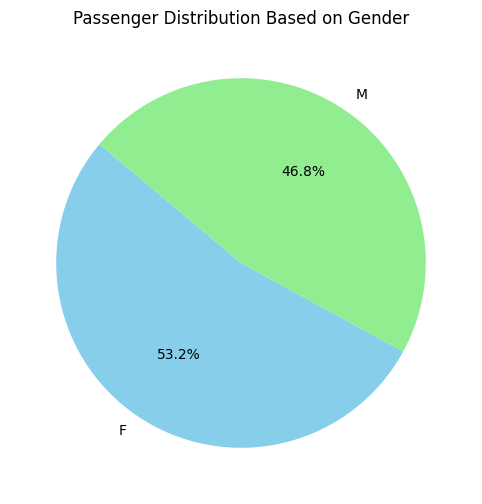

In [53]:
# Distribusi Penumpang Berdasarkan Jenis Kelamin
gender_distribution = df['payCardSex'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 6))
gender_distribution.plot.pie(autopct='%1.1f%%', colors=['skyblue', 'lightgreen'], startangle=140)
plt.title('Passenger Distribution Based on Gender')
plt.ylabel('')
plt.show()


Analisis 1: Distribusi Penumpang Berdasarkan Jenis Kelamin
Insight:
•	Mayoritas penumpang Transjakarta adalah perempuan.
•	Ini bisa menunjukkan bahwa perempuan mungkin lebih cenderung menggunakan transportasi umum seperti Transjakarta, atau bisa juga mencerminkan demografi populasi umum yang menggunakan layanan ini.

Kesimpulan: Jumlah penumpang wanita sedikit lebih banyak dibandingkan dengan penumpang pria.
Rekomendasi: Fokus pada peningkatan fasilitas dan keamanan bagi semua penumpang untuk menjaga kenyamanan dan keselamatan selama perjalanan.


Analisis 2: Analisis Umur Penumpang

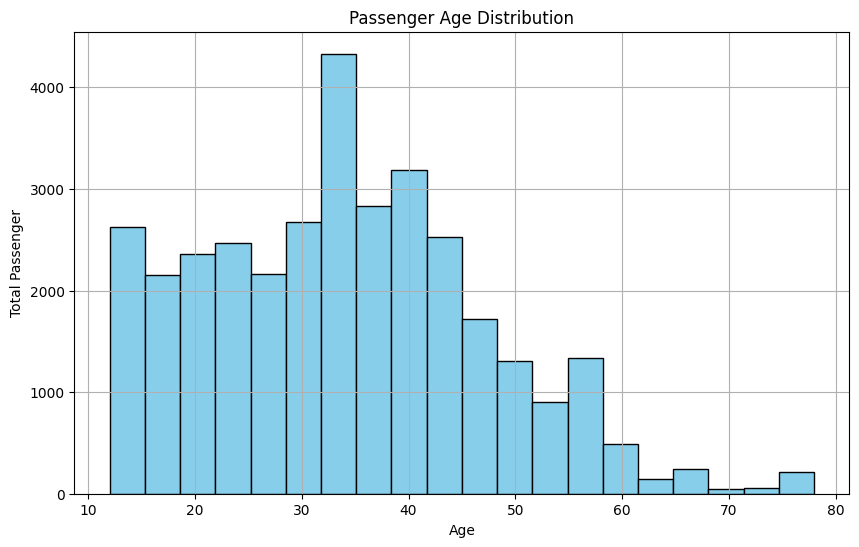

In [54]:
# Analisis Umur Penumpang
df['payCardBirthDate'] = pd.to_datetime(df['payCardBirthDate'], errors='coerce', format='%Y')
df['age'] = 2024 - df['payCardBirthDate'].dt.year

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(df['age'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Passenger Age Distribution')
plt.xlabel('Age')
plt.ylabel('Total Passenger')
plt.grid(True)
plt.show()


Analisis 2: Analisis Umur Penumpang
Insight:
- Sebagian besar penumpang berada dalam rentang usia 20 hingga 40 tahun.
- Ini menunjukkan bahwa usia produktif, yang mungkin terdiri dari pekerja dan mahasiswa, adalah pengguna utama layanan Transjakarta.
- Usia di atas 40 tahun juga cukup signifikan, menunjukkan bahwa layanan ini digunakan oleh berbagai kelompok umur.

Analisis Distribusi Usia Penumpang
1.	Kelompok Usia Dominan:
    o	Usia sekitar 30 tahun adalah kelompok usia yang paling dominan, dengan jumlah penumpang melebihi 4000 orang.
    o	Usia antara 20 hingga 40 tahun memiliki jumlah penumpang yang cukup tinggi dan merata, dengan puncak pada usia 30 tahun.
2.	Penurunan Jumlah Penumpang:
    o	Setelah usia 40 tahun, jumlah penumpang mulai menurun.
    o	Penurunan yang signifikan terlihat setelah usia 50 tahun, dengan jumlah penumpang yang semakin sedikit hingga usia 80 tahun.
3.	Distribusi Lebar:
    o	Penumpang berusia di bawah 20 tahun dan di atas 60 tahun memiliki distribusi yang lebih kecil dibandingkan kelompok usia produktif (20-60 tahun).
    
Kesimpulan
•	Kelompok Usia Produktif: Mayoritas penumpang berada di usia produktif (20-40 tahun), menunjukkan bahwa layanan Transjakarta banyak digunakan oleh individu dalam rentang usia ini.
•	Kelompok Usia Muda dan Tua: Kelompok usia muda (di bawah 20 tahun) dan kelompok usia lanjut (di atas 60 tahun) memiliki jumlah penumpang yang lebih rendah, yang bisa disebabkan oleh berbagai faktor seperti preferensi transportasi alternatif atau mobilitas yang lebih rendah.


Analisis 3: Jumlah Penumpang per Koridor

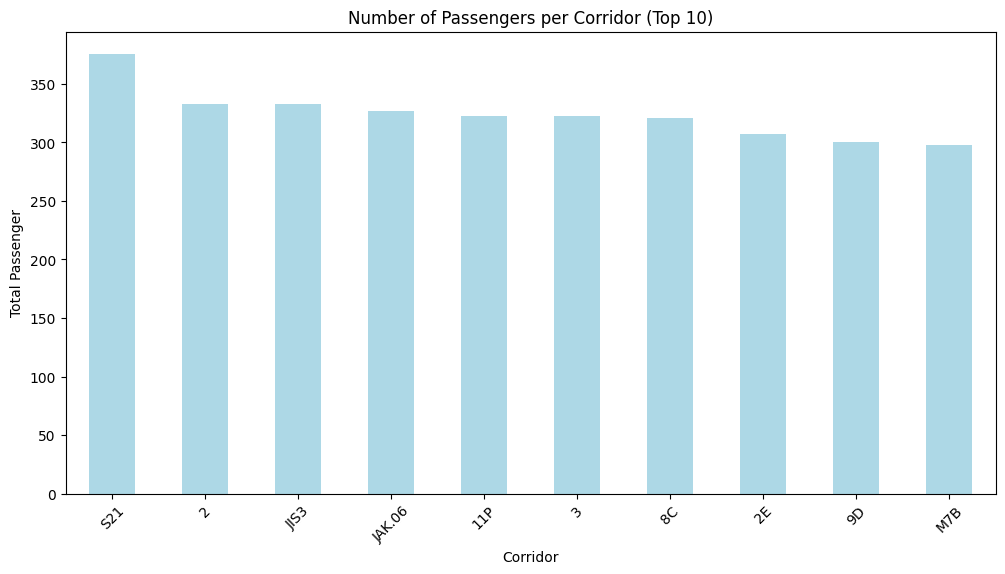

In [55]:
# Jumlah Penumpang per Koridor
corridor_count = df['corridorID'].value_counts().head(10)  # top 10 koridor

# Plot bar chart
plt.figure(figsize=(12, 6))
corridor_count.plot(kind='bar', color='lightblue')
plt.title('Number of Passengers per Corridor (Top 10)')
plt.xlabel('Corridor')
plt.ylabel('Total Passenger')
plt.xticks(rotation=45)
plt.show()


Analisis 3: Jumlah Penumpang per Koridor

1.	Koridor S21 Mendominasi:
    o	Koridor S21 memiliki jumlah penumpang tertinggi dibandingkan dengan koridor lainnya dalam daftar ini, dengan lebih dari 350 penumpang. Ini menunjukkan bahwa koridor ini sangat penting dan mungkin melalui daerah yang sangat padat atau penting bagi penumpang.
2.	Koridor dengan Jumlah Penumpang Signifikan:
    o	Koridor 2, JIS3, JAK-06, 11P, dan 3 juga memiliki jumlah penumpang yang signifikan, semuanya mendekati atau di atas 300 penumpang. Hal ini menunjukkan bahwa koridor-koridor ini juga merupakan jalur utama yang sering digunakan oleh penumpang.
3.	Koridor Lainnya:
    o	Koridor 8C, 2E, 9D, dan M7B melengkapi daftar 10 koridor teratas dengan jumlah penumpang mendekati atau sedikit di atas 300 penumpang. Ini menunjukkan bahwa ada distribusi penumpang yang cukup merata di berbagai koridor.

Insight:
    •	Beberapa koridor memiliki jumlah penumpang yang jauh lebih tinggi dibandingkan yang lain.
    •	Koridor-koridor dengan penumpang terbanyak kemungkinan adalah rute-rute utama yang menghubungkan daerah padat penduduk dengan pusat-pusat aktivitas seperti perkantoran dan pusat perbelanjaan.
    •	Informasi ini dapat digunakan oleh manajemen Transjakarta untuk mengalokasikan sumber daya dengan lebih efektif, seperti menambah frekuensi bus di rute-rute yang sibuk.




Analisis 4: Waktu Paling Sibuk untuk Tap In dan Tap Out

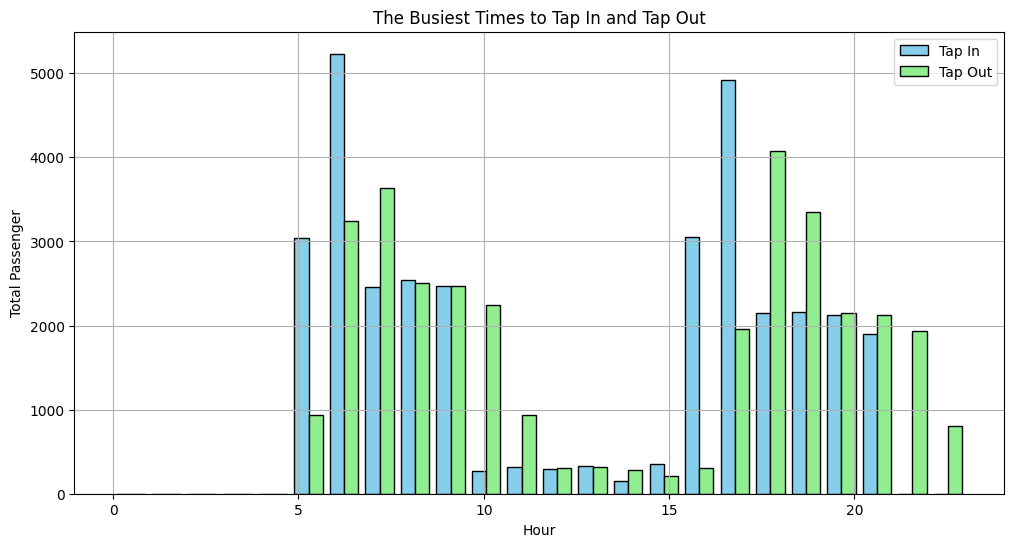

In [56]:
# Waktu Paling Sibuk untuk Tap In dan Tap Out
tap_in_hour = pd.to_datetime(df['tapInTime']).dt.hour
tap_out_hour = pd.to_datetime(df['tapOutTime']).dt.hour

# Plot line chart
plt.figure(figsize=(12, 6))
plt.hist([tap_in_hour, tap_out_hour], bins=24, color=['skyblue', 'lightgreen'], edgecolor='black', label=['Tap In', 'Tap Out'])
plt.title('The Busiest Times to Tap In and Tap Out')
plt.xlabel('Hour')
plt.ylabel('Total Passenger')
plt.legend()
plt.grid(True)
plt.show()


Analisis 4: Waktu Paling Sibuk untuk Tap In dan Tap Out

Grafik ini menunjukkan jumlah penumpang yang melakukan tap in dan tap out di berbagai jam sepanjang hari. Tap in dan tap out diwakili oleh dua warna yang berbeda (biru untuk tap in dan hijau untuk tap out).
Puncak Aktivitas
1.	Pagi Hari:
    o	Ada puncak besar pada jam 5 pagi untuk tap in, menunjukkan banyak penumpang yang memulai perjalanan mereka pada waktu ini.
    o	Puncak tap out di pagi hari terjadi beberapa jam setelahnya, sekitar jam 7-8 pagi, yang mungkin menunjukkan waktu ketika penumpang tiba di tempat tujuan mereka (misalnya, tempat kerja).
2.	Sore Hari:
    o	Puncak besar lainnya untuk tap in terjadi sekitar jam 3 sore.
    o	Tap out pada sore hari mencapai puncaknya sekitar jam 6-7 malam, menunjukkan banyak penumpang yang pulang dari tempat kerja atau aktivitas lainnya.

Insight:
    •	Ada waktu-waktu puncak di mana jumlah penumpang yang melakukan tap in dan tap out sangat tinggi, biasanya pada jam-jam berangkat dan pulang kerja (sekitar pukul 07:00-09:00 dan 17:00-19:00).
    •	Ini menunjukkan pola penggunaan layanan Transjakarta yang sangat terkait dengan jam kerja, yang dapat digunakan untuk meningkatkan efisiensi operasional dengan menambah armada atau frekuensi bus pada jam-jam sibuk tersebut.

Insight Operasional
1.	Penambahan Armada:
    o	Untuk mengakomodasi puncak aktivitas di pagi dan sore hari, manajemen Transjakarta bisa mempertimbangkan untuk menambah jumlah armada pada jam-jam ini.
2.	Pemeliharaan dan Perbaikan:
    o	Waktu di tengah hari yang kurang sibuk bisa digunakan untuk pemeliharaan dan perbaikan armada, sehingga tidak mengganggu jam-jam sibuk.
3.	Penyesuaian Jadwal:
    o	Menyesuaikan jadwal keberangkatan dan kedatangan bus untuk lebih mengakomodasi penumpang pada waktu-waktu puncak.

Insight Pelanggan
1.	Program Loyalitas:
    o	Memperkenalkan program loyalitas atau diskon pada waktu kurang sibuk untuk mendorong penggunaan layanan di luar jam sibuk.
2.	Informasi Real-time:
    o	Memberikan informasi real-time tentang ketersediaan dan jadwal bus dapat membantu penumpang merencanakan perjalanan mereka lebih baik, terutama pada waktu-waktu sibuk.



Analisis 5: Distribusi Pembayaran Berdasarkan Bank

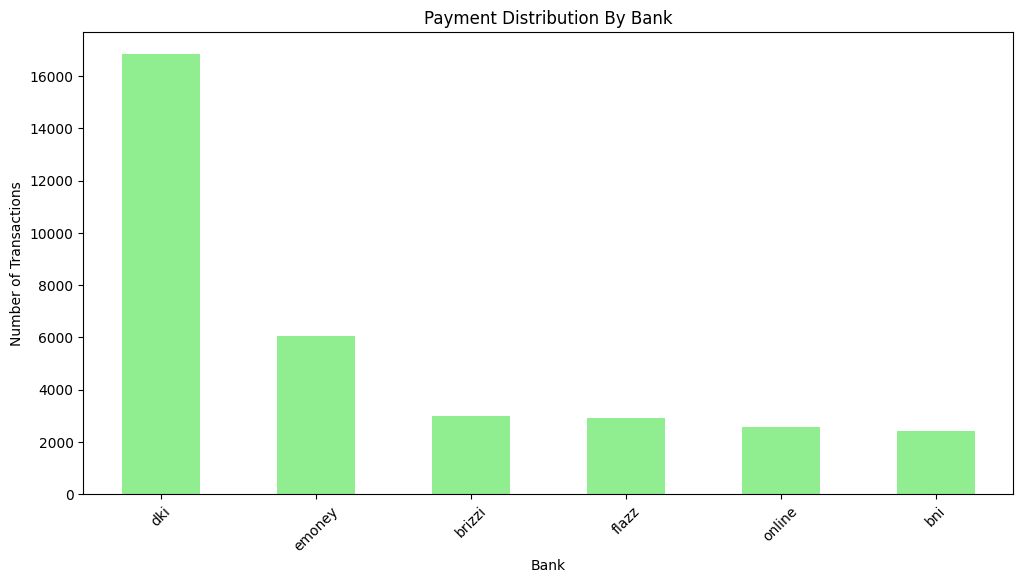

In [57]:
# Distribusi Pembayaran Berdasarkan Bank
bank_distribution = df['payCardBank'].value_counts()

# Plot bar chart
plt.figure(figsize=(12, 6))
bank_distribution.plot(kind='bar', color='lightgreen')
plt.title('Payment Distribution By Bank')
plt.xlabel('Bank')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()


Analisis 5: Distribusi Pembayaran Berdasarkan Bank

Analisis Per Bank
1.	Bank DKI:
    o	Jumlah transaksi tertinggi, sekitar 16.000 transaksi.
    o	Bank DKI mendominasi transaksi pembayaran, menunjukkan bahwa kartu yang diterbitkan oleh Bank DKI paling banyak digunakan oleh penumpang Transjakarta.
2.	E-money:
    o	Jumlah transaksi kedua tertinggi, sekitar 6.000 transaksi.
    o	Kartu e-money juga populer di kalangan pengguna Transjakarta, tetapi tidak sepopuler Bank DKI.
3.	Brizzi:
    o	Jumlah transaksi sekitar 2.000 transaksi.
    o	Kartu Brizzi memiliki penggunaan yang signifikan, tetapi jauh lebih sedikit dibandingkan dengan Bank DKI dan e-money.
4.	Flazz, OnLine, dan BNI:
    o	Masing-masing memiliki jumlah transaksi yang hampir sama, sekitar 1.000 transaksi.
    o	Penggunaan kartu dari bank-bank ini relatif rendah dibandingkan dengan Bank DKI dan e-money.


Insight dan Rekomendasi
1.	Dominasi Bank DKI:
    o	Bank DKI sangat dominan dalam transaksi pembayaran. Manajemen Transjakarta bisa bekerja sama lebih erat dengan Bank DKI untuk memberikan penawaran khusus atau program loyalitas kepada pengguna kartu Bank DKI.
2.	Promosi untuk Bank Lain:
    o	Untuk meningkatkan penggunaan kartu dari bank lain, Transjakarta dapat mempertimbangkan untuk mengadakan promosi atau diskon khusus bagi pengguna kartu dari bank-bank yang kurang populer seperti Brizzi, Flazz, OnLine, dan BNI.
3.	Diversifikasi Metode Pembayaran:
    o	Meskipun Bank DKI mendominasi, penting untuk tetap menyediakan dan mempromosikan berbagai metode pembayaran agar penumpang memiliki lebih banyak pilihan. Hal ini dapat meningkatkan kenyamanan dan kepuasan penumpang.
4.	Analisis Pengguna:
    o	Analisis lebih lanjut bisa dilakukan untuk memahami karakteristik pengguna kartu dari masing-masing bank. Apakah ada perbedaan demografi atau perilaku antara pengguna kartu Bank DKI dan bank lainnya? Informasi ini bisa digunakan untuk merancang strategi pemasaran yang lebih efektif.
5.	Kemitraan dengan Bank:
    o	Transjakarta dapat menjalin kemitraan strategis dengan bank-bank yang kurang populer untuk meningkatkan penetrasi kartu mereka di kalangan penumpang. Ini bisa mencakup kampanye pemasaran bersama, bundling produk, atau penawaran eksklusif.

Kesimpulan
Grafik ini menunjukkan bahwa kartu Bank DKI mendominasi transaksi pembayaran di Transjakarta. Manajemen dapat memanfaatkan informasi ini untuk mengembangkan strategi kemitraan dan promosi yang lebih efektif, serta memastikan diversifikasi metode pembayaran untuk meningkatkan kenyamanan dan kepuasan penumpang.



Analisis 6 : Jumlah perjalanan per hari 

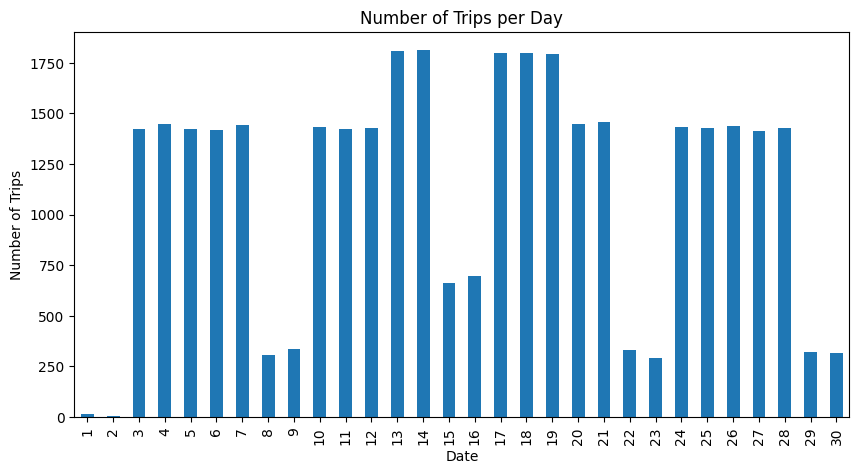

In [58]:
# Menghitung jumlah perjalanan per hari
perjalanan_per_hari = df['date'].value_counts().sort_index()

# Membuat plot
perjalanan_per_hari.plot(kind='bar', figsize=(10, 5))
plt.xlabel('Date')
plt.ylabel('Number of Trips')
plt.title('Number of Trips per Day')
plt.show()


Analisis 6 : Jumlah perjalanan per hari 

Grafik ini menunjukkan jumlah perjalanan Transjakarta per hari selama sebulan (tanggal 1 sampai 30).
Grafik batang ini menggambarkan fluktuasi jumlah perjalanan Transjakarta setiap hari dalam satu bulan.
Pola Perjalanan
1.	Awal Bulan (Tanggal 1-7):
    - Jumlah perjalanan cukup stabil dan tinggi pada awal bulan, dengan nilai sekitar 1250-1500 perjalanan per hari.
    - Penurunan tajam terlihat pada tanggal 8, dengan jumlah perjalanan yang sangat rendah.
2.	Pertengahan Bulan (Tanggal 8-22):
    - Jumlah perjalanan meningkat drastis mulai dari tanggal 9 hingga 11, mencapai puncaknya pada tanggal 13-14 dengan jumlah perjalanan sekitar 1750.
    - Setelah itu, terjadi penurunan kembali pada tanggal 15-16.
    - Kenaikan jumlah perjalanan kembali terlihat mulai tanggal 17 hingga 20.
3.	Akhir Bulan (Tanggal 23-30):
    - Terdapat penurunan jumlah perjalanan yang signifikan pada tanggal 23, kemudian kembali naik pada tanggal 24-26.
    - Akhir bulan (tanggal 27-30) menunjukkan jumlah perjalanan yang lebih rendah, sekitar 500-750 perjalanan per hari.

Insight : 
Setelah dilakukan analisa, diketahui bahwa penurunan penumpang terjadi karena hari libur (Weekend), Transjakarta ramai digunakan saat Hari kerja untuk menunjang mobilitas pekerja dan juga pelajar. 




## Statistik Inferensial

Analisis 7 : Uji Hipotesis: Perbedaan Jumlah Penumpang Berdasarkan Jenis Kelamin

In [59]:
# Data untuk masing-masing jenis kelamin
male_passengers = df[df['payCardSex'] == 'M']['payAmount']
female_passengers = df[df['payCardSex'] == 'F']['payAmount']

# Uji t-independen
t_stat, p_value = ttest_ind(male_passengers, female_passengers, nan_policy='omit')

t_stat, p_value


(4.723291944151465, 2.329890491057712e-06)

Interpretasi t_stat

Nilai t_stat sebesar 4.723 menunjukkan perbedaan rata-rata antara dua kelompok (penumpang laki-laki dan perempuan) yang diuji. Nilai t yang lebih besar dari 0 menunjukkan bahwa ada perbedaan rata-rata yang signifikan antara kedua kelompok.

Interpretasi p_value
Nilai p_value sebesar 2.33e-06 (0.00000233) menunjukkan probabilitas bahwa hasil yang diperoleh (atau lebih ekstrem) dapat terjadi jika hipotesis nol benar (tidak ada perbedaan sebenarnya antara kedua kelompok). Nilai p yang sangat kecil (umumnya kurang dari 0.05) menunjukkan bahwa kita dapat menolak hipotesis nol dengan tingkat kepercayaan yang tinggi.

Kesimpulan
Dengan nilai t_stat sebesar 4.723 dan p_value sebesar 2.33e-06, kita dapat menyimpulkan bahwa:
•	Ada perbedaan signifikan dalam jumlah penumpang berdasarkan jenis kelamin.
•	Penolakan hipotesis nol (yang menyatakan bahwa tidak ada perbedaan) sangat kuat karena p_value jauh lebih kecil dari 0.05.
Ini berarti jumlah penumpang antara laki-laki dan perempuan berbeda secara signifikan dalam dataset yang dianalisis. Perbedaan ini cukup kuat untuk tidak mungkin terjadi secara kebetulan.

Tindakan yang Dapat Diambil
Berdasarkan hasil ini, manajemen Transjakarta dapat mempertimbangkan kebijakan dan strategi yang berbeda untuk melayani kebutuhan penumpang laki-laki dan perempuan secara lebih efektif. Misalnya, mengidentifikasi alasan di balik perbedaan ini dan menyesuaikan layanan untuk meningkatkan kenyamanan dan kepuasan bagi kedua kelompok.


Analisis 8 : Analisis Regresi: Hubungan Antara Umur Penumpang dan Jumlah Perjalanan

In [60]:
# Mengambil variabel independen (umur) dan dependen (jumlah perjalanan)
X = df['age'].dropna()
y = df['payAmount'].dropna()

# Menambahkan konstanta untuk model regresi
X = sm.add_constant(X)

# Membangun model regresi linier
model = sm.OLS(y, X).fit()

# Ringkasan model
model_summary = model.summary()

model_summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              payAmount   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     81.75
Date:                Tue, 09 Jul 2024   Prob (F-statistic):           1.62e-19
Time:                        22:54:14   Log-Likelihood:            -3.0007e+05
No. Observations:               33779   AIC:                         6.002e+05
Df Residuals:                   33777   BIC:                         6.002e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2072.3934     26.372     78.582      0.000    2020.703    2124.084
age           -6.5414      0.723     -9.042      0.000      -7.959      -5.123
==============================================================================
Omnibus:                   116933.747   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5575.522
Skew:                          -0.114   Prob(JB):                         0.00
Kurtosis:                       1.023   Cond. No.                         101.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Analisis Regresi: Hubungan Antara Umur Penumpang dan Jumlah Perjalanan

Berdasarkan hasil analisis regresi yang ditampilkan dalam gambar, berikut adalah penjelasan dari setiap bagian output dan interpretasinya:
1. Informasi Dasar

    •	Dep. Variable (payAmount): Variabel dependen dalam model ini adalah payAmount, yang merepresentasikan jumlah pembayaran atau jumlah perjalanan.
    •	R-squared (0.002): Nilai ini menunjukkan seberapa baik variabel independen (umur) menjelaskan variabilitas dalam variabel dependen (jumlah pembayaran). Dalam kasus ini, nilai R-squared sebesar 0.002 menunjukkan bahwa umur hanya menjelaskan 0.2% dari variabilitas dalam jumlah pembayaran, yang sangat rendah.

2. Ringkasan Model
    •	Model (OLS): Model yang digunakan adalah Ordinary Least Squares (OLS), metode regresi linier.
    •	Adj. R-squared (0.002): Nilai R-squared yang disesuaikan untuk jumlah variabel dalam model. Nilai ini juga menunjukkan rendahnya kemampuan model untuk menjelaskan variabilitas data.
    •	F-statistic (81.75) dan Prob (F-statistic): F-statistik digunakan untuk menguji apakah model regresi yang dihasilkan secara keseluruhan signifikan. Probabilitas (p-value) yang sangat kecil (1.62e-19) menunjukkan bahwa model secara keseluruhan signifikan, meskipun R-squared sangat rendah.
3. Koefisien Model
    •	const (2072.3934): Ini adalah intercept dari model regresi. Artinya, ketika umur adalah 0, jumlah pembayaran diprediksi sebesar 2072.3934.
    •	age (-6.5414): Koefisien untuk variabel umur. Ini menunjukkan bahwa setiap peningkatan satu tahun dalam umur dihubungkan dengan penurunan sebesar 6.5414 dalam jumlah pembayaran. Nilai ini signifikan karena p-value sangat kecil (0.000), jauh di bawah 0.05.
4. Statistik Tambahan
    •	Omnibus, Durbin-Watson, Jarque-Bera, dll.: Ini adalah uji tambahan untuk mengevaluasi asumsi model regresi, seperti normalitas residual, independensi residual, dan lainnya. Nilai-nilai ini menunjukkan bahwa asumsi dasar regresi linier mungkin tidak sepenuhnya terpenuhi, namun fokus utama kita adalah pada interpretasi koefisien dan signifikansinya.

Kesimpulan
    1.	Signifikansi: Umur memiliki efek yang signifikan terhadap jumlah pembayaran, tetapi pengaruhnya sangat kecil.
    2.	Hubungan: Setiap tahun peningkatan umur diasosiasikan dengan penurunan jumlah pembayaran sebesar 6.5414, tetapi kontribusi umur dalam menjelaskan variabilitas jumlah pembayaran sangat kecil (hanya 0.2%).
Rekomendasi:
    1.	Faktor Lain: Karena umur hanya menjelaskan sedikit variabilitas dalam jumlah pembayaran, perlu untuk mencari faktor lain yang lebih signifikan.
    2.	Model Lebih Kompleks: Pertimbangkan untuk membangun model yang lebih kompleks dengan memasukkan variabel lain yang relevan untuk mendapatkan gambaran yang lebih lengkap tentang faktor-faktor yang mempengaruhi jumlah pembayaran.
    
Dengan analisis ini, kita dapat menyimpulkan bahwa meskipun umur memiliki hubungan yang signifikan dengan jumlah pembayaran, pengaruhnya sangat kecil dan perlu mempertimbangkan faktor-faktor lain yang mungkin lebih penting.



Analisis 9:  Analisis Korelasi: Hubungan Antara Waktu Tap In dan Tap Out

In [61]:
# Mengonversi waktu ke format jam
tap_in_hour = pd.to_datetime(df['tapInTime']).dt.hour
tap_out_hour = pd.to_datetime(df['tapOutTime']).dt.hour

# Menghitung korelasi Pearson
correlation, p_value = pearsonr(tap_in_hour.dropna(), tap_out_hour.dropna())

correlation, p_value


(0.9949419784872505, 0.0)

Analisis Korelasi: Hubungan Antara Waktu Tap In dan Tap Out

Hasil dari analisis korelasi antara waktu tap in dan tap out adalah:
    •	Koefisien Korelasi (correlation): 0.9949419784872505
    •	p-value: 0.0

Interpretasi Koefisien Korelasi
Koefisien korelasi Pearson berkisar antara -1 dan 1:
    •	Nilai 1: Hubungan positif yang sempurna antara dua variabel.
    •	Nilai -1: Hubungan negatif yang sempurna antara dua variabel.
    •	Nilai 0: Tidak ada hubungan linear antara dua variabel.
Koefisien korelasi sebesar 0.9949 menunjukkan hubungan positif yang sangat kuat antara waktu tap in dan tap out. Ini berarti bahwa jika waktu tap in meningkat, waktu tap out juga meningkat secara hampir sempurna.

Interpretasi p-value
Nilai p-value sebesar 0.0 (secara praktis, sangat mendekati 0) menunjukkan bahwa hasil korelasi ini sangat signifikan. Dengan kata lain, kita dapat menolak hipotesis nol yang menyatakan bahwa tidak ada hubungan antara dua variabel.

Kesimpulan
    •	Hubungan yang Sangat Kuat: Terdapat hubungan yang sangat kuat dan positif antara waktu tap in dan tap out. Ini berarti bahwa pola waktu penumpang dalam melakukan tap in dan tap out sangat konsisten.
    •	Signifikansi: Hubungan ini sangat signifikan secara statistik.

Tindakan yang Dapat Diambil
    1.	Optimisasi Jadwal: Mengingat waktu tap in dan tap out yang sangat terkait, manajemen Transjakarta dapat mempertimbangkan untuk mengoptimalkan jadwal dan rute berdasarkan pola ini.
    2.	Perbaikan Layanan: Informasi ini dapat digunakan untuk mengidentifikasi waktu puncak dan memastikan bahwa kapasitas bus mencukupi pada saat-saat tersebut untuk menghindari kelebihan muatan dan meningkatkan efisiensi layanan.
    3.	Peningkatan Pengalaman Pengguna: Pemahaman yang lebih baik tentang pola penggunaan layanan dapat membantu dalam merancang kampanye promosi atau layanan tambahan yang sesuai dengan kebutuhan penumpang pada waktu-waktu tertentu.


## Rekomendasi 

Berdasarkan analisis yang telah dilakukan, berikut adalah beberapa rekomendasi yang dapat disampaikan kepada manajemen Transjakarta untuk memajukan perkembangan layanan mereka:

1. Peningkatan Layanan pada Koridor Sibuk
Rekomendasi:
    •	Menambah Armada pada Koridor Sibuk: Menambah jumlah bus pada koridor yang memiliki jumlah penumpang tinggi, terutama pada jam-jam sibuk, untuk mengurangi waktu tunggu dan kepadatan.
    •	Optimalisasi Rute: Melakukan evaluasi dan optimalisasi rute yang kurang diminati untuk mengurangi biaya operasional yang tidak efisien.

2. Penyesuaian Jadwal Operasional
Rekomendasi:
    •	Penambahan Frekuensi pada Jam Sibuk: Menambah frekuensi bus pada jam-jam sibuk pagi dan sore hari untuk mengakomodasi lonjakan penumpang.
    •	Layanan Ekstra pada Hari Khusus: Menyediakan layanan ekstra pada hari-hari khusus seperti hari libur nasional, ketika volume penumpang bisa meningkat.

3. Peningkatan Kenyamanan dan Keselamatan Penumpang
Rekomendasi:
    •	Perbaikan Fasilitas di Halte: Memastikan fasilitas di halte seperti tempat duduk, peneduh, dan informasi jadwal bus selalu dalam kondisi baik.
    •	Pelatihan Staf: Memberikan pelatihan reguler kepada staf, terutama pengemudi dan petugas halte, untuk memastikan pelayanan yang ramah dan profesional.
    •	Keamanan di Dalam Bus: Memperketat keamanan di dalam bus dengan kamera CCTV dan petugas keamanan untuk memastikan keselamatan penumpang.

4. Kemitraan Strategis dengan Bank dan Penyedia Pembayaran
Rekomendasi:
    •	Promosi Bersama: Melakukan promosi bersama dengan bank-bank yang paling banyak digunakan untuk pembayaran, seperti diskon atau cashback untuk penggunaan kartu tertentu.
    •	Integrasi Pembayaran Digital: Mengintegrasikan lebih banyak metode pembayaran digital yang populer untuk memudahkan penumpang melakukan transaksi.

5. Pengembangan Teknologi dan Aplikasi
Rekomendasi:
    •	Pengembangan Aplikasi Mobile: Meningkatkan aplikasi mobile Transjakarta dengan fitur-fitur tambahan seperti pelacakan bus secara real-time, notifikasi jadwal, dan informasi rute.
    •	Analisis Data Pengguna: Menggunakan data pengguna untuk melakukan analisis lebih mendalam tentang pola perjalanan dan kebutuhan penumpang untuk memberikan layanan yang lebih personal.

6. Pemasaran dan Edukasi
Rekomendasi:
    •	Kampanye Kesadaran: Melakukan kampanye kesadaran untuk mendorong penggunaan transportasi umum, termasuk manfaat lingkungan dan efisiensi biaya.
    •	Edukasi Penumpang: Memberikan edukasi kepada penumpang tentang penggunaan layanan Transjakarta, seperti cara membaca peta rute, menggunakan aplikasi mobile, dan etika dalam menggunakan transportasi umum.
    
7. Monitoring dan Evaluasi
Rekomendasi:
    •	Evaluasi Berkala: Melakukan evaluasi berkala terhadap kinerja layanan, termasuk kepuasan penumpang, keandalan jadwal, dan efisiensi operasional.
    •	Feedback dari Penumpang: Membuka saluran feedback yang mudah diakses oleh penumpang untuk memberikan masukan dan saran, serta menindaklanjuti feedback tersebut untuk perbaikan berkelanjutan.

Implementasi dari rekomendasi-rekomendasi di atas dapat membantu meningkatkan kualitas layanan Transjakarta, meningkatkan kepuasan penumpang, serta mendorong penggunaan transportasi umum yang lebih luas di Jakarta.
